# Лабораторная работа 2
Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.


Цель лабораторной работы: изучение способов предварительной обработки данных для дальнейшего формирования моделей.


Задание:
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
обработку пропусков в данных;
кодирование категориальных признаков;
масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('./restaurant-scores-lives-standard.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(53973, 23)

In [4]:
# типы колонок
data.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code          1018
business_latitude            19556
business_longitude           19556
business_location            19556
business_phone_number        36938
inspection_id                    0
inspection_date                  0
inspection_score             13610
inspection_type                  0
violation_id                 12870
violation_description        12870
risk_category                12870
Neighborhoods (old)          19594
Police Districts             19594
Supervisor Districts         19594
Fire Prevention Districts    19646
Zip Codes                    19576
Analysis Neighborhoods       19594
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 53973


## Обработка пропусков в данных

### Простые стратегии - удаление или заполнение нулями

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((53973, 23), (53973, 8))

In [9]:
data_new_1.head()

,business_id,business_name,business_address,business_city,business_state,inspection_id,inspection_date,inspection_type
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,101192_20190606,2019-06-06T00:00:00.000,New Ownership
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,97975_20190725,2019-07-25T00:00:00.000,Routine - Unscheduled
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,92982_20170912,2017-09-12T00:00:00.000,New Ownership
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,101389_20190625,2019-06-25T00:00:00.000,New Construction
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,85986_20161011,2016-10-11T00:00:00.000,New Ownership


In [10]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((53973, 23), (6566, 23))

In [11]:
data_new_2.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
11,4794,VICTOR'S,210 TOWNSEND St,San Francisco,CA,94107,37.778634,-122.393089,"{'type': 'Point', 'coordinates': [-122.393089,...",1.415561e+10,...,Routine - Unscheduled,4794_20181030_103138,Improper storage use or identification of toxi...,Low Risk,34.0,2.0,9.0,6.0,28856.0,34.0
172,63652,SFDH - Banquet Main Kitchen,450 Powell St 2nd Floor,San Francisco,CA,94102,37.788918,-122.408507,"{'type': 'Point', 'coordinates': [-122.408507,...",1.415540e+10,...,Routine - Unscheduled,63652_20190904_103133,Foods not protected from contamination,Moderate Risk,6.0,1.0,10.0,5.0,28852.0,8.0
327,328,Miyako,1470 Fillmore St,San Francisco,CA,94115,37.783017,-122.432584,"{'type': 'Point', 'coordinates': [-122.432584,...",1.415554e+10,...,Routine - Unscheduled,328_20161122_103103,High risk food holding temperature,High Risk,41.0,9.0,11.0,15.0,29490.0,39.0
372,2684,ERIC'S RESTAURANT,1500 Church St,San Francisco,CA,94131,37.746759,-122.426995,"{'type': 'Point', 'coordinates': [-122.426995,...",1.415528e+10,...,Routine - Unscheduled,2684_20190715_103109,Unclean or unsanitary food contact surfaces,High Risk,22.0,7.0,5.0,2.0,63.0,22.0
397,328,Miyako,1470 Fillmore St,San Francisco,CA,94115,37.783017,-122.432584,"{'type': 'Point', 'coordinates': [-122.432584,...",1.415554e+10,...,Routine - Unscheduled,328_20161122_103149,Wiping cloths not clean or properly stored or ...,Low Risk,41.0,9.0,11.0,15.0,29490.0,39.0


## "Внедрение значений" - импьютация (imputation)

In [12]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка business_latitude. Тип данных float64. Количество пустых значений 19556, 36.23%.
Колонка business_longitude. Тип данных float64. Количество пустых значений 19556, 36.23%.
Колонка business_phone_number. Тип данных float64. Количество пустых значений 36938, 68.44%.
Колонка inspection_score. Тип данных float64. Количество пустых значений 13610, 25.22%.
Колонка Neighborhoods (old). Тип данных float64. Количество пустых значений 19594, 36.3%.
Колонка Police Districts. Тип данных float64. Количество пустых значений 19594, 36.3%.
Колонка Supervisor Districts. Тип данных float64. Количество пустых значений 19594, 36.3%.
Колонка Fire Prevention Districts. Тип данных float64. Количество пустых значений 19646, 36.4%.
Колонка Zip Codes. Тип данных float64. Количество пустых значений 19576, 36.27%.
Колонка Analysis Neighborhoods. Тип данных float64. Количество пустых значений 19594, 36.3%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,business_latitude,business_longitude,business_phone_number,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,NaN,NaN,1.415043e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.415724e+10,96.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.415488e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
53968,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN
53969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53970,NaN,NaN,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN
53971,NaN,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN


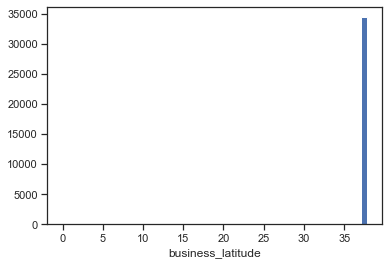

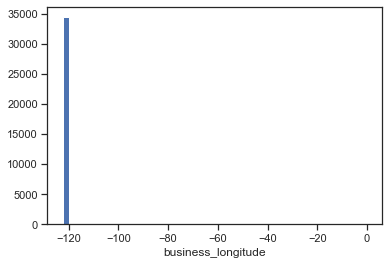

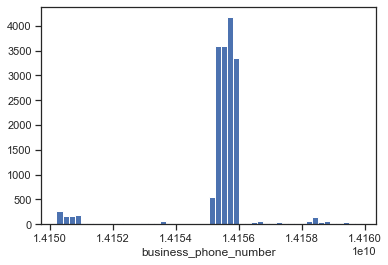

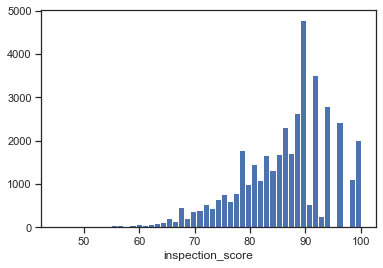

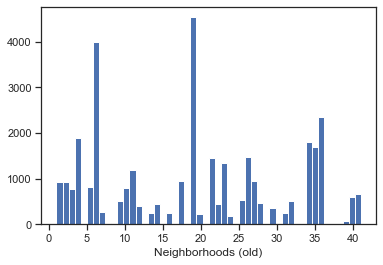

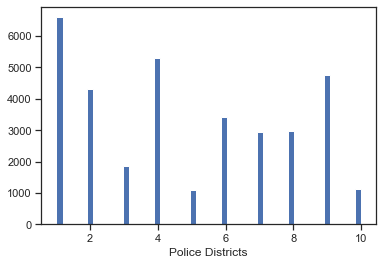

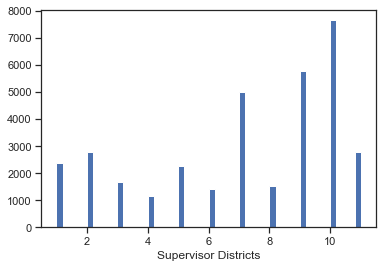

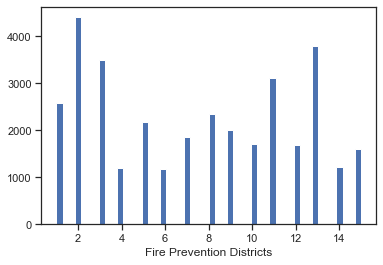

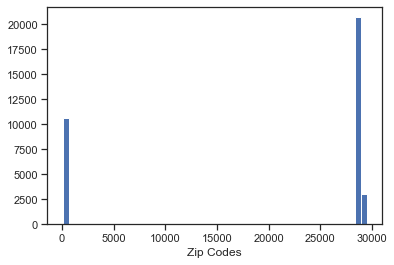

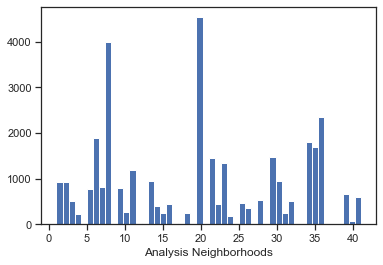

In [14]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [15]:
data_num_inspection_scores = data_num[['inspection_score']]
data_num_inspection_scores.head()

,inspection_score
0,NaN
1,96.0
2,NaN
3,NaN
4,NaN


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_inspection_scores)
mask_missing_values_only

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [18]:
strategies=['mean', 'median', 'most_frequent']

In [19]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_inspection_scores)
    return data_num_imp[mask_missing_values_only]

In [20]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([86.22679186, 86.22679186, 86.22679186, ..., 86.22679186,
        86.22679186, 86.22679186]))

In [21]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [22]:
data[['inspection_score']].describe()

,inspection_score
count,40363.000000
mean,86.226792
std,8.462915
min,45.000000
25%,81.000000
50%,87.000000
75%,92.000000
max,100.000000


In [23]:
test_num_impute_col(data, 'inspection_score', strategies[0])

('inspection_score', 'mean', 13610, 86.22679186383569, 86.22679186383569)

### Обработка пропусков в категориальных данных

In [24]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка business_postal_code. Тип данных object. Количество пустых значений 1018, 1.89%.
Колонка business_location. Тип данных object. Количество пустых значений 19556, 36.23%.
Колонка violation_id. Тип данных object. Количество пустых значений 12870, 23.85%.
Колонка violation_description. Тип данных object. Количество пустых значений 12870, 23.85%.
Колонка risk_category. Тип данных object. Количество пустых значений 12870, 23.85%.


In [25]:
cat_temp_data = data[['risk_category']]
cat_temp_data.head()

,risk_category
0,NaN
1,Moderate Risk
2,NaN
3,NaN
4,High Risk


In [26]:
cat_temp_data['risk_category'].unique()

array([nan, 'Moderate Risk', 'High Risk', 'Low Risk'], dtype=object)

In [27]:
cat_temp_data[cat_temp_data['risk_category'].isnull()].shape

(12870, 1)

In [28]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Low Risk'],
       ['Moderate Risk'],
       ['Low Risk'],
       ...,
       ['Moderate Risk'],
       ['Moderate Risk'],
       ['Low Risk']], dtype=object)

In [29]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['High Risk', 'Low Risk', 'Moderate Risk'], dtype=object)

In [30]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['NA'],
       ['Moderate Risk'],
       ['NA'],
       ...,
       ['Moderate Risk'],
       ['Moderate Risk'],
       ['Low Risk']], dtype=object)

In [31]:
np.unique(data_imp3)

array(['High Risk', 'Low Risk', 'Moderate Risk', 'NA'], dtype=object)

In [32]:
data_imp3[data_imp3=='NA'].size

12870

## Преобразование категориальных признаков в числовые

In [33]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Low Risk
1,Moderate Risk
2,Low Risk
3,Low Risk
4,High Risk
...,...
53968,Moderate Risk
53969,Low Risk
53970,Moderate Risk
53971,Moderate Risk


### Кодирование категорий целочисленными значениями (label encoding)


#### Использование LabelEncoder

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
cat_enc['c1'].unique()

array(['Low Risk', 'Moderate Risk', 'High Risk'], dtype=object)

In [36]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [37]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['High Risk', 'Low Risk', 'Moderate Risk'], dtype=object)

In [38]:
cat_enc_le

array([1, 2, 1, ..., 2, 2, 1])

In [39]:
np.unique(cat_enc_le)

array([0, 1, 2])

#### Кодирование категорий наборами бинарных значений

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [42]:
cat_enc.shape

(53973, 1)

In [43]:
cat_enc_ohe.shape

(53973, 3)

In [44]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.]])

In [45]:
cat_enc.head(10)

,c1
0,Low Risk
1,Moderate Risk
2,Low Risk
3,Low Risk
4,High Risk
5,Low Risk
6,Low Risk
7,Moderate Risk
8,Moderate Risk
9,Low Risk


In [46]:
pd.get_dummies(cat_enc).head()

,c1_High Risk,c1_Low Risk,c1_Moderate Risk
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,1,0,0


In [47]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,risk_category_High Risk,risk_category_Low Risk,risk_category_Moderate Risk,risk_category_nan
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0


## Масштабирование данных

In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [49]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['inspection_score']])

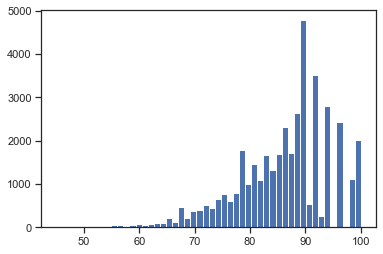

In [50]:
plt.hist(data['inspection_score'], 50)
plt.show()

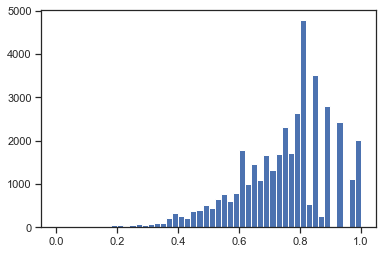

In [51]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

In [52]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['inspection_score']])